In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_25")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [4]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [7]:
data = dataset.iloc[:, :16]
data['label'] = dataset['label']

In [8]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,Cz..,C2..,C4..,C6..,Cp5.,Cp3.,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,-29.0,-15.0,-15.0,-25.0,-10.0,-14.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,-41.0,-31.0,-34.0,-46.0,-23.0,-30.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,-53.0,-41.0,-48.0,-56.0,-50.0,-47.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,-65.0,-55.0,-58.0,-67.0,-50.0,-60.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,-73.0,-66.0,-64.0,-70.0,-48.0,-71.0,0


In [9]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [10]:
train_accuracies = []

In [11]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 394560 samples
394560/394560 [==============================] - 49s 125us/sample - loss: 1.0036 - acc: 0.5175
epoch 2/100
Train on 394560 samples
394560/394560 [==============================] - 45s 114us/sample - loss: 0.9318 - acc: 0.5597
epoch 3/100
Train on 394560 samples
394560/394560 [==============================] - 46s 116us/sample - loss: 0.8882 - acc: 0.5823
epoch 4/100
Train on 394560 samples
394560/394560 [==============================] - 46s 116us/sample - loss: 0.8614 - acc: 0.5960
epoch 5/100
Train on 394560 samples
394560/394560 [==============================] - 45s 114us/sample - loss: 0.8418 - acc: 0.6063
epoch 6/100
Train on 394560 samples
394560/394560 [==============================] - 46s 115us/sample - loss: 0.8254 - acc: 0.6144
epoch 7/100
Train on 394560 samples
394560/394560 [==============================] - 46s 118us/sample - loss: 0.8128 - acc: 0.6205
epoch 8/100
Train on 394560 samples
394560/394560 [==============================] 

In [14]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.7875
Test Accuracy: 0.6580


In [15]:
print(train_accuracies)

[0.5175309, 0.5597273, 0.58226633, 0.59598035, 0.60625255, 0.6144262, 0.6205089, 0.6261025, 0.6299802, 0.6345296, 0.6380424, 0.6416971, 0.6446827, 0.64747566, 0.64957166, 0.65170825, 0.6537257, 0.65579635, 0.6566378, 0.65816355, 0.66021645, 0.66139245, 0.6634073, 0.66341496, 0.6649458, 0.66605335, 0.66759425, 0.66799724, 0.6681696, 0.67045826, 0.67098796, 0.67182684, 0.6731524, 0.67364407, 0.67332727, 0.67490876, 0.6747998, 0.67574006, 0.6761684, 0.6766119, 0.6775243, 0.678348, 0.6781554, 0.67950124, 0.67934406, 0.6803807, 0.68046683, 0.68151104, 0.6815212, 0.6819596, 0.68181014, 0.68202555, 0.6823449, 0.68325984, 0.6836856, 0.683308, 0.68437755, 0.6844916, 0.6852747, 0.685518, 0.68545973, 0.685921, 0.68641776, 0.68615675, 0.6861948, 0.68711984, 0.686542, 0.6870286, 0.68783456, 0.68808544, 0.68747973, 0.6878726, 0.68842256, 0.68896747, 0.68866587, 0.6886887, 0.6890663, 0.68935776, 0.6898089, 0.68912965, 0.6897253, 0.6903462, 0.6906681, 0.69056416, 0.69036394, 0.6906301, 0.6909925, 0.69

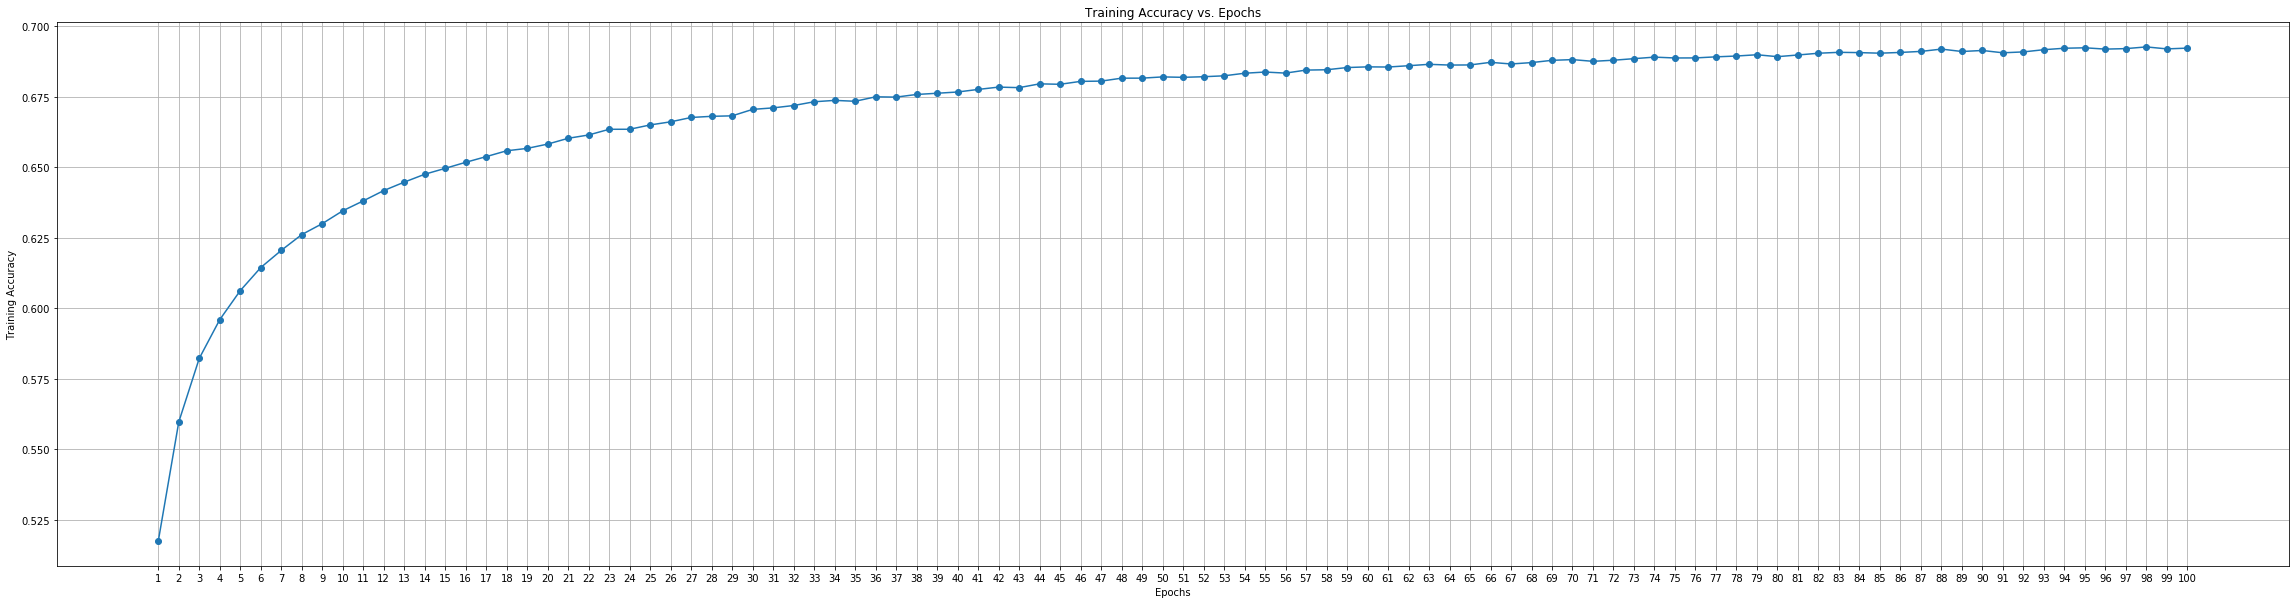

In [16]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()